### Objective

- Learn how to implement PCA on a real-world dataset (Socio-economic data by country)
- Select top k most important features using PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
country_data = pd.read_csv("https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv")
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
# Checking the percentage of missing values
round(100 * (country_data.isnull().sum() / len(country_data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

<Axes: xlabel='gdpp'>

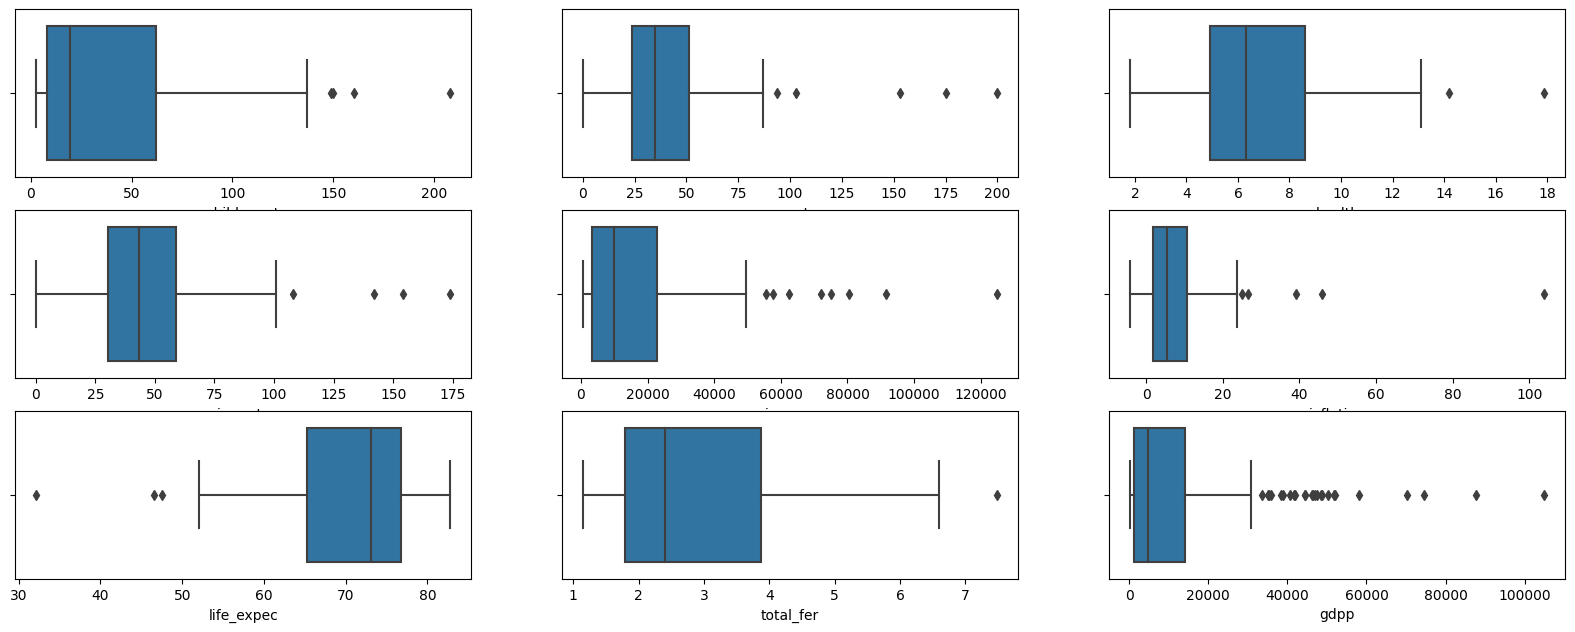

In [5]:
# checking for outliers using box-plots

plt.figure(figsize=(20,10), dpi=100)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = country_data)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = country_data)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = country_data)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = country_data)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = country_data)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = country_data)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = country_data)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = country_data)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = country_data)

In [8]:
# checking for outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
pd.DataFrame(z)



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,1.138280,0.279088,0.082455,0.808245,0.157336,1.619092,1.902882,0.679180
1,0.538949,0.479658,0.097016,0.070837,0.375369,0.312347,0.647866,0.859973,0.485623
2,0.272833,0.099122,0.966073,0.641762,0.220844,0.789274,0.670423,0.038404,0.465376
3,2.007808,0.775381,1.448071,0.165315,0.585043,1.387054,1.179234,2.128151,0.516268
4,0.695634,0.160668,0.286894,0.497568,0.101732,0.601749,0.704258,0.541946,0.041817
...,...,...,...,...,...,...,...,...,...
162,0.225578,0.200917,0.571711,0.240700,0.738527,0.489784,0.852161,0.365754,0.546913
163,0.526514,0.461363,0.695862,1.213499,0.033542,3.616865,0.546361,0.316678,0.029323
164,0.372315,1.130305,0.008877,1.380030,0.658404,0.409732,0.286958,0.661206,0.637754
165,0.448417,0.406478,0.597272,0.517472,0.658924,1.500916,0.344633,1.140944,0.637754


In [9]:
# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))



Below are the outlier points along with the respective column numbers in the second array


(array([ 23,  66,  66,  82,  91,  91,  91,  91,  98,  98, 112, 113, 114,
       123, 123, 132, 133, 133, 145, 159, 163]), array([4, 0, 6, 4, 1, 3, 4, 8, 1, 3, 7, 5, 8, 4, 8, 0, 1, 3, 8, 2, 5]))


In [10]:
# Removing the outliers

country_data_outliers_removed = country_data[(z<3).all(axis=1)]

In [11]:
print('Shape of dataframe before outlier removal: ' + str(country_data.shape))
print("\n")
print('Shape of dataframe after outlier removal: ' + str(country_data_outliers_removed.shape))

Shape of dataframe before outlier removal: (167, 10)


Shape of dataframe after outlier removal: (153, 10)


In [12]:
X = country_data_outliers_removed.drop('country',axis =1)
y = country_data_outliers_removed['country']

In [13]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled

array([[ 1.46183636, -1.41330427,  0.31809414, ..., -1.73823548,
         1.94438462, -0.72205486],
       [-0.56911214, -0.52600184, -0.08875965, ...,  0.71229884,
        -0.88698624, -0.46758977],
       [-0.27385196, -0.01333821, -1.02886841, ...,  0.73668227,
        -0.04504383, -0.44097058],
       ...,
       [-0.3842296 ,  1.64295967,  0.02579142, ...,  0.32216403,
        -0.6832905 , -0.66759343],
       [ 0.5263859 , -0.42741268, -0.62991469, ..., -0.36057191,
         1.16355093, -0.66759343],
       [ 1.26591606, -0.08235062, -0.34946208, ..., -2.25028743,
         1.65921057, -0.65680187]])

In [16]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874
...,...,...,...,...,...,...,...,...,...
148,-0.025502,-0.343612,-0.381062,-0.903307,-0.757746,1.368064,-0.202080,-0.418486,-0.662557
149,-0.221423,0.390877,-0.602264,0.364991,-0.854287,-0.635844,-0.909199,0.369138,-0.548167
150,-0.384230,1.642960,0.025791,1.806239,-0.739037,0.732820,0.322164,-0.683290,-0.667593
151,0.526386,-0.427413,-0.629915,-0.594094,-0.739785,2.393118,-0.360572,1.163551,-0.667593


In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(random_state=123)

In [19]:
pca.fit(X_scaled)

PCA(random_state=123)

In [20]:
pca.components_[0]

array([-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
       -0.22650995,  0.42715413, -0.40550525,  0.39482635])

In [21]:
pca.explained_variance_ratio_

array([0.47638387, 0.16902847, 0.13080614, 0.10179586, 0.06939066,
       0.02084938, 0.01747184, 0.00883956, 0.00543422])

In [22]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.47638387, 0.64541234, 0.77621848, 0.87801434, 0.94740499,
       0.96825437, 0.98572622, 0.99456578, 1.        ])

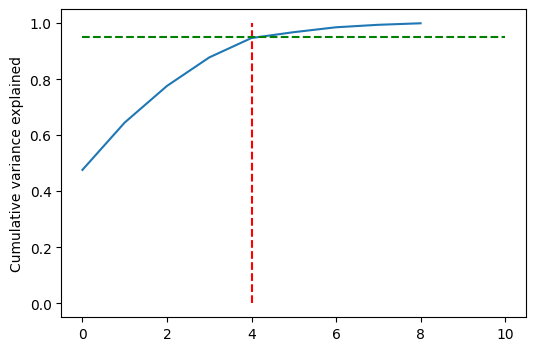

In [23]:
fig = plt.figure(figsize=[6,4],dpi=100)
plt.plot(var_cumu)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=10, xmin=0, colors="g", linestyles="--")
plt.ylabel("Cumulative variance explained")
plt.show()

In [24]:
pca_final = PCA(n_components=5, random_state=123)
X_pca_final = pca_final.fit_transform(X_scaled)

In [25]:
pd.DataFrame(X_pca_final)

,0,1,2,3,4
0,-3.130806,-0.471117,1.336274,0.641322,0.195569
1,0.551781,-0.230632,-0.071234,-1.377036,0.130326
2,-0.356257,-0.542354,-1.818159,-0.216783,0.366919
3,-3.454323,1.114470,-1.553986,2.168457,-0.048581
4,1.308957,0.612033,-0.065287,-0.687559,-0.431937
...,...,...,...,...,...
148,-1.018529,-0.731559,-1.161339,-0.476265,0.827645
149,-0.891335,0.907202,0.189163,-0.635586,-0.586198
150,0.331876,2.386196,-0.572829,-0.650777,1.155192
151,-2.233628,-0.522003,-1.400054,0.649399,1.214449


In [26]:
print(X.shape)
print(X_pca_final.shape)

(153, 9)
(153, 5)
